In [3]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga
from State import State
from GenerateDemandMonthly import GenerateDemandMonthly
from GenAlgo import Genetic_Algo_No_Season
from GenAlgo import Genetic_Algo_Seasonal
import pandas as pd

In [4]:
algorithm_param = {'max_num_iteration': 1000,\
                   'population_size':250,\
                   'mutation_probability':0.5,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':300}

df = pd.read_csv("./TOTALSA.csv")
mean = df['TOTALSA'].mean()
std = df['TOTALSA'].std()
varbound=np.array([[round(mean * 2), round(mean * 10)]]*7)

def objective_no_season(X):
    return -1 * Genetic_Algo_No_Season(X) #7 parameters

model1=ga(function=objective_no_season,\
        dimension=7,variable_type='int',\
        variable_boundaries=varbound, \
        algorithm_parameters=algorithm_param)

 The best solution found:                                                                           
 [ 81.  49.  71.  44. 108.  41.  50.]

 Objective function:
 -3364.2237999999993


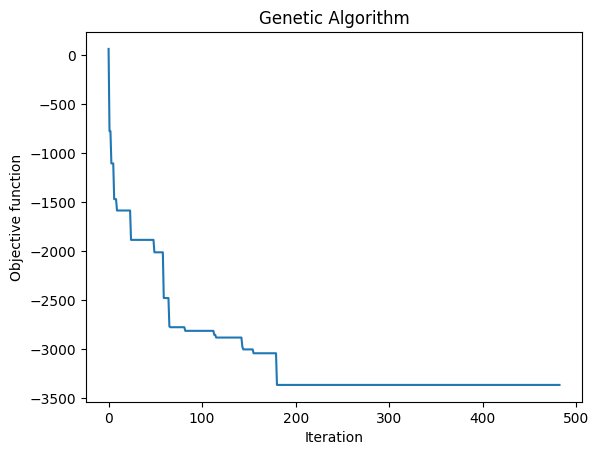

In [5]:
model1.run() 